# Matching Problem

Given a graph $G=(V,E)$, find a maximum set of edges without common vertices.

## Variables:
$$
x_e = \begin{cases}
1 \text{ if edge $e$ is selected }\\
0 \text{ otherwise }
\end{cases}
$$

## Formulation:
\begin{eqnarray}
max && \sum_{e \in E} x_e\\
s.t.\\
\sum_{e \in E(i)} x_e \leq 1 , &&&& \forall i \in V\\
x_e \in {\{0,1\}}^{|E|}
\end{eqnarray}

In [13]:
import networkx as nx
import gurobipy as gb
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
G = nx.Graph()

In [15]:
G.add_nodes_from([1,2,3,4,5])

In [16]:
G.add_edges_from([(1,2),(1,4),(2,3),(2,4),(3,5),(4,5)])

G:


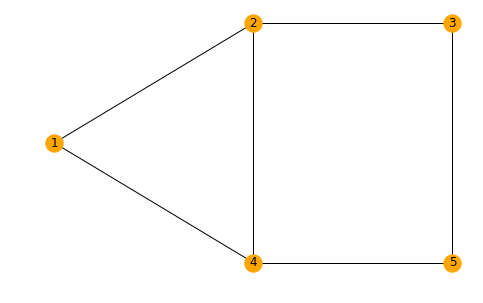

In [17]:
plt.figure(figsize=(8,5))
plt.axis('off')
pos = {1:(0,1),2:(1,2),3:(2,2),4:(1,0),5:(2,0)}
node_labels = {i:i for i in G.nodes()}

nx.draw_networkx_nodes(G,pos,G.nodes(),node_color='orange')
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos,labels=node_labels)

print("G:")

In [18]:
matching = gb.Model()

Academic license - for non-commercial use only


In [19]:
x = matching.addVars(G.edges(),vtype=gb.GRB.BINARY,name='x')

In [20]:
matching.setObjective(x.sum(),gb.GRB.MAXIMIZE)

In [21]:
for i in G.nodes():
    name = "node_%s" % (i)
    linexpr = gb.LinExpr()
    for j in G.adj[i]:
        if matching.getVarByName("x[%s,%s]" % (i,j)) is not None:
            linexpr+= x[i,j]
        else:
            linexpr+= x[j,i]
    matching.addConstr(linexpr <= 1, name=name)

In [22]:
matching.update()

In [23]:
matching.write('matching.lp')

In [24]:
matching.optimize()

Optimize a model with 5 rows, 6 columns and 12 nonzeros
Variable types: 0 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 2.0000000
Presolve removed 0 rows and 1 columns
Presolve time: 0.00s
Presolved: 5 rows, 5 columns, 10 nonzeros
Variable types: 0 continuous, 5 integer (5 binary)

Root relaxation: cutoff, 2 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0     cutoff    0         2.00000    2.00000  0.00%     -    0s

Explored 0 nodes (2 simplex iterations) in 0.23 seconds
Thread count was 4 (of 4 available processors)

Solution count 1: 2 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.000000000000e+00, best bound 2.000000000000e+00, gap 0.0000%


In [25]:
print("Obj:",matching.ObjVal)

Obj: 2.0


In [26]:
for i in matching.getVars():
    print("%s = %g" % (i.VarName,i.x))

x[1,2] = 1
x[1,4] = -0
x[2,3] = -0
x[2,4] = -0
x[3,5] = 1
x[4,5] = -0


sol G:


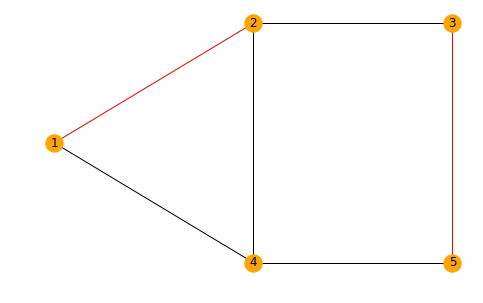

In [29]:
plt.figure(figsize=(8,5))
plt.axis('off')
pos = {1:(0,1),2:(1,2),3:(2,2),4:(1,0),5:(2,0)}
node_labels = {i:i for i in G.nodes()}

edge_colors = ['red' if i.x == 1 else 'black' for i in matching.getVars()]

nx.draw_networkx_nodes(G,pos,G.nodes(),node_color='orange')
nx.draw_networkx_edges(G,pos,edge_color=edge_colors)
nx.draw_networkx_labels(G,pos,labels=node_labels)

print("sol G:")